# Importieren der Bibliotheken

In [848]:
%load_ext bigquery_magics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
%load_ext autoreload
%autoreload 2

The bigquery_magics extension is already loaded. To reload it, use:
  %reload_ext bigquery_magics
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 20 years ago. So if today is 1 April 2025 then the weather we want to forecast is for the 2 April 2005. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part.

## Part 1

 - Leider hatte ich Schwierigkeiten bigquery bzw die google console mit meinen jupyter-notebook zu verknüpfen
 - ich habe versucht de SQL Code von der Console dort auszuführen und habe den Code dazu dann hier reingefügt
 - -> Nichtsdestrotz habe ich die Aufgaben mit Python versucht zu lösen als Equivalent 

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2000 till 2005 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2000 till 2005. 

# 1. + 2. Task

Start by checking which year received the most snowfall in our data. 

Add an additional field that indicates the daily change in snow depth measured at every station. And identify the station and day for which the snow depth increased the most.  

# --- Lösung mit Python für Part 1 ---

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2000 till 2005 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

# Einlesen der Daten

In [849]:
pd.set_option('display.max_columns', None) # Damit ich alle Spalten sehe kann
df=pd.read_csv("coding_challenge.csv",low_memory=False) #low_memory um warning zu vermeiden
df_copy=df.copy() #Kopie gemacht damit man das Orginale und eine Kopie hat die man nicht überschreibt

# Date Spalte wird in Datetime format umgewandelt

In [850]:
df["date"]=pd.to_datetime(df['date'])
#Date Spalte wird in Datetime format umgewandelt
#Change the date format to 'YYYY-MM-DD'

# Filter aus dem DataFrame alle Samples die zwischen 2000-2005 liegen und alle Stationnummern die 725300-726300 beinhalten

In [851]:
df[(df['year'].between(2000,2005))&(df['station_number'].between(725300,726300))]

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2000-08-11,725327,99999,2000,8,11,75.000000,11,60.500000,11.0,1020.500000,11.0,NaN,NaN,10.0,11.0,7.7,11.0,11.1,NaN,71.599998,True,NaN,NaN,0.00,NaN,False,False,False,False,False,False
1,2000-09-17,725316,99999,2000,9,17,62.400002,23,47.500000,23.0,NaN,NaN,NaN,NaN,10.0,23.0,8.4,20.0,14.0,NaN,48.200001,True,NaN,NaN,0.00,NaN,False,False,False,False,False,False
2,2000-07-11,725316,99999,2000,7,11,76.800003,23,73.000000,23.0,NaN,NaN,NaN,NaN,8.4,23.0,6.0,21.0,12.0,NaN,71.599998,True,NaN,NaN,NaN,NaN,False,False,False,False,False,False
3,2000-08-14,725305,99999,2000,8,14,74.099998,23,66.599998,23.0,1016.400024,23.0,NaN,NaN,8.0,23.0,6.4,23.0,11.1,NaN,64.400002,True,NaN,NaN,0.01,NaN,False,False,False,False,False,False
4,2000-01-23,725317,99999,2000,1,23,25.299999,23,22.500000,23.0,1017.599976,23.0,NaN,NaN,3.9,23.0,8.2,23.0,15.0,NaN,17.600000,True,NaN,NaN,0.00,NaN,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37280,2005-01-08,725327,99999,2005,1,8,27.200001,24,24.000000,24.0,1024.699951,19.0,NaN,NaN,7.1,24.0,5.1,24.0,9.9,NaN,24.100000,False,NaN,NaN,0.04,NaN,False,False,False,False,False,False
37281,2005-10-14,725330,14827,2005,10,14,60.500000,24,53.900002,24.0,1018.299988,24.0,988.700012,23.0,4.3,24.0,4.4,24.0,10.1,15.9,53.599998,True,NaN,NaN,0.00,NaN,True,True,True,True,True,True
37282,2005-07-15,725330,14827,2005,7,15,77.000000,24,70.300003,24.0,1013.599976,24.0,984.500000,24.0,6.8,24.0,4.9,24.0,12.0,NaN,69.800003,True,NaN,NaN,0.04,NaN,True,True,True,True,True,True
37283,2005-04-03,725327,99999,2005,4,3,44.099998,24,29.000000,24.0,1015.900024,24.0,NaN,NaN,10.0,24.0,6.7,24.0,12.0,NaN,32.000000,False,NaN,NaN,0.00,NaN,False,False,False,False,False,False


### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2000 till 2005. 

# Gleiche wie vorhin nur mit Statiosnnummer zwischen 725300-725330

In [852]:
df = df[(df['year'].between(2000,2005))&(df['station_number'].between(725300,725330))]
df

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2000-08-11,725327,99999,2000,8,11,75.000000,11,60.500000,11.0,1020.500000,11.0,NaN,NaN,10.0,11.0,7.7,11.0,11.1,NaN,71.599998,True,NaN,NaN,0.00,NaN,False,False,False,False,False,False
1,2000-09-17,725316,99999,2000,9,17,62.400002,23,47.500000,23.0,NaN,NaN,NaN,NaN,10.0,23.0,8.4,20.0,14.0,NaN,48.200001,True,NaN,NaN,0.00,NaN,False,False,False,False,False,False
2,2000-07-11,725316,99999,2000,7,11,76.800003,23,73.000000,23.0,NaN,NaN,NaN,NaN,8.4,23.0,6.0,21.0,12.0,NaN,71.599998,True,NaN,NaN,NaN,NaN,False,False,False,False,False,False
3,2000-08-14,725305,99999,2000,8,14,74.099998,23,66.599998,23.0,1016.400024,23.0,NaN,NaN,8.0,23.0,6.4,23.0,11.1,NaN,64.400002,True,NaN,NaN,0.01,NaN,False,False,False,False,False,False
4,2000-01-23,725317,99999,2000,1,23,25.299999,23,22.500000,23.0,1017.599976,23.0,NaN,NaN,3.9,23.0,8.2,23.0,15.0,NaN,17.600000,True,NaN,NaN,0.00,NaN,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37280,2005-01-08,725327,99999,2005,1,8,27.200001,24,24.000000,24.0,1024.699951,19.0,NaN,NaN,7.1,24.0,5.1,24.0,9.9,NaN,24.100000,False,NaN,NaN,0.04,NaN,False,False,False,False,False,False
37281,2005-10-14,725330,14827,2005,10,14,60.500000,24,53.900002,24.0,1018.299988,24.0,988.700012,23.0,4.3,24.0,4.4,24.0,10.1,15.9,53.599998,True,NaN,NaN,0.00,NaN,True,True,True,True,True,True
37282,2005-07-15,725330,14827,2005,7,15,77.000000,24,70.300003,24.0,1013.599976,24.0,984.500000,24.0,6.8,24.0,4.9,24.0,12.0,NaN,69.800003,True,NaN,NaN,0.04,NaN,True,True,True,True,True,True
37283,2005-04-03,725327,99999,2005,4,3,44.099998,24,29.000000,24.0,1015.900024,24.0,NaN,NaN,10.0,24.0,6.7,24.0,12.0,NaN,32.000000,False,NaN,NaN,0.00,NaN,False,False,False,False,False,False


Start by checking which year received the most snowfall in our data. 

# Im welchen Jahr war der Schneefall am stärksten/häufigsten?

In [853]:
df.groupby('year')['snow_depth'].sum()

year
2000    1084.500006
2001     591.300003
2002     286.300001
2003     303.700002
2004     389.799999
2005     474.300002
Name: snow_depth, dtype: float64

Laut der Schnee tiefe ist es 2000

In [854]:
df.groupby('year')['snow'].sum()

year
2000    797
2001    759
2002    745
2003    555
2004    262
2005    826
Name: snow, dtype: int64

Laut der Spalte Snow ( ob an dem Tag Schnee gefallen ist) wäre es 2005 

Add an additional field that indicates the daily change in snow depth measured at every station. And identify the station and day for which the snow depth increased the most.  

# Erstellung einer neuen Spalte die Aussagt, wie sich der Schneefall verändert für die jeweils Station

In [855]:
df = df.sort_values(by=['station_number', 'date'])
df['snow_depth_change'] = df.groupby('station_number')['snow_depth'].diff()
df

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,snow_depth_change
9787,2000-01-01,725300,94846,2000,1,1,38.400002,24,29.700001,24.0,1015.700012,24.0,NaN,NaN,9.8,24.0,6.8,24.0,13.0,20.0,26.100000,False,NaN,NaN,0.00,NaN,False,False,False,False,False,False,NaN
6583,2000-01-02,725300,94846,2000,1,2,47.799999,24,42.299999,24.0,1006.400024,23.0,NaN,NaN,7.7,24.0,10.2,24.0,21.0,28.9,36.000000,False,NaN,NaN,0.01,NaN,True,True,True,True,True,True,NaN
9797,2000-01-03,725300,94846,2000,1,3,37.500000,24,34.099998,24.0,1011.099976,24.0,NaN,NaN,7.2,24.0,11.3,24.0,18.1,26.0,35.099998,True,NaN,NaN,0.01,NaN,True,True,True,True,True,True,NaN
11031,2000-01-04,725300,94846,2000,1,4,29.700001,24,25.900000,24.0,1008.700012,24.0,NaN,NaN,7.0,24.0,12.3,24.0,19.0,22.9,26.100000,False,NaN,NaN,0.25,1.2,True,True,True,True,True,True,NaN
4638,2000-01-05,725300,94846,2000,1,5,20.400000,24,16.500000,24.0,1025.199951,24.0,NaN,NaN,8.7,24.0,8.1,24.0,12.0,16.9,12.200000,True,NaN,NaN,0.00,NaN,True,True,True,True,True,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,2005-12-27,725330,14827,2005,12,27,34.900002,24,30.799999,24.0,1011.799988,24.0,NaN,NaN,7.2,24.0,8.4,24.0,12.0,NaN,32.000000,False,NaN,NaN,0.00,NaN,True,True,True,True,True,True,NaN
9622,2005-12-28,725330,14827,2005,12,28,42.500000,24,40.099998,24.0,999.700012,13.0,NaN,NaN,4.3,24.0,4.0,24.0,10.1,NaN,32.000000,False,NaN,NaN,0.30,NaN,True,True,True,True,True,True,NaN
34640,2005-12-29,725330,14827,2005,12,29,36.799999,24,34.200001,24.0,1002.400024,23.0,NaN,NaN,7.5,24.0,9.5,24.0,13.0,19.0,35.099998,False,NaN,NaN,0.27,NaN,True,True,True,True,True,True,NaN
9652,2005-12-30,725330,14827,2005,12,30,35.500000,24,31.700001,24.0,1011.700012,21.0,NaN,NaN,6.8,24.0,6.3,24.0,12.0,NaN,33.799999,True,NaN,NaN,0.00,NaN,True,True,True,True,True,True,NaN


In [856]:
df.loc[df['snow_depth_change'].idxmax()]

date                                  2005-01-22 00:00:00
station_number                                     725300
wban_number                                         94846
year                                                 2005
month                                                   1
day                                                    22
mean_temp                                       18.700001
num_mean_temp_samples                                  24
mean_dew_point                                       14.6
num_mean_dew_point_samples                           24.0
mean_sealevel_pressure                        1013.200012
num_mean_sealevel_pressure_samples                   17.0
mean_station_pressure                          987.900024
num_mean_station_pressure_samples                    16.0
mean_visibility                                       1.7
num_mean_visibility_samples                          24.0
mean_wind_speed                                      12.3
num_mean_wind_

- Der Tag an dem die größte Schneetiefeänderung vorhanden war ist der 22.01.2005 mit einer Tiefe von 9,8

Do further checks on the remaining dataset, clean or drop data depending on how you see appropriate. 

# --- EDA - General ---

In [857]:
df.head()

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,snow_depth_change
9787,2000-01-01,725300,94846,2000,1,1,38.400002,24,29.700001,24.0,1015.700012,24.0,NaN,NaN,9.8,24.0,6.8,24.0,13.0,20.0,26.100000,False,NaN,NaN,0.00,NaN,False,False,False,False,False,False,NaN
6583,2000-01-02,725300,94846,2000,1,2,47.799999,24,42.299999,24.0,1006.400024,23.0,NaN,NaN,7.7,24.0,10.2,24.0,21.0,28.9,36.000000,False,NaN,NaN,0.01,NaN,True,True,True,True,True,True,NaN
9797,2000-01-03,725300,94846,2000,1,3,37.500000,24,34.099998,24.0,1011.099976,24.0,NaN,NaN,7.2,24.0,11.3,24.0,18.1,26.0,35.099998,True,NaN,NaN,0.01,NaN,True,True,True,True,True,True,NaN
11031,2000-01-04,725300,94846,2000,1,4,29.700001,24,25.900000,24.0,1008.700012,24.0,NaN,NaN,7.0,24.0,12.3,24.0,19.0,22.9,26.100000,False,NaN,NaN,0.25,1.2,True,True,True,True,True,True,NaN
4638,2000-01-05,725300,94846,2000,1,5,20.400000,24,16.500000,24.0,1025.199951,24.0,NaN,NaN,8.7,24.0,8.1,24.0,12.0,16.9,12.200000,True,NaN,NaN,0.00,NaN,True,True,True,True,True,True,NaN


In [858]:
df.tail()

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,snow_depth_change
27165,2005-12-27,725330,14827,2005,12,27,34.900002,24,30.799999,24.0,1011.799988,24.0,NaN,NaN,7.2,24.0,8.4,24.0,12.0,NaN,32.000000,False,NaN,NaN,0.00,NaN,True,True,True,True,True,True,NaN
9622,2005-12-28,725330,14827,2005,12,28,42.500000,24,40.099998,24.0,999.700012,13.0,NaN,NaN,4.3,24.0,4.0,24.0,10.1,NaN,32.000000,False,NaN,NaN,0.30,NaN,True,True,True,True,True,True,NaN
34640,2005-12-29,725330,14827,2005,12,29,36.799999,24,34.200001,24.0,1002.400024,23.0,NaN,NaN,7.5,24.0,9.5,24.0,13.0,19.0,35.099998,False,NaN,NaN,0.27,NaN,True,True,True,True,True,True,NaN
9652,2005-12-30,725330,14827,2005,12,30,35.500000,24,31.700001,24.0,1011.700012,21.0,NaN,NaN,6.8,24.0,6.3,24.0,12.0,NaN,33.799999,True,NaN,NaN,0.00,NaN,True,True,True,True,True,True,NaN
34985,2005-12-31,725330,14827,2005,12,31,35.799999,24,32.799999,24.0,1006.500000,16.0,NaN,NaN,6.0,24.0,11.5,24.0,15.9,23.9,33.799999,True,NaN,NaN,0.32,NaN,True,True,True,True,True,True,NaN


In [859]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21853 entries, 9787 to 34985
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                21853 non-null  datetime64[ns]
 1   station_number                      21853 non-null  int64         
 2   wban_number                         21853 non-null  int64         
 3   year                                21853 non-null  int64         
 4   month                               21853 non-null  int64         
 5   day                                 21853 non-null  int64         
 6   mean_temp                           21853 non-null  float64       
 7   num_mean_temp_samples               21853 non-null  int64         
 8   mean_dew_point                      21846 non-null  float64       
 9   num_mean_dew_point_samples          21846 non-null  float64       
 10  mean_sealevel_pressure  

- Mehre Spalten haben viele NAs oder auch nur NAs sind nicht hilfreich für unsere Klassifikation

In [860]:
df.describe()

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,snow_depth_change
count,21853,21853.000000,21853.000000,21853.000000,21853.000000,21853.000000,21853.000000,21853.000000,21846.000000,21846.000000,19266.000000,19266.000000,1599.000000,1599.000000,21837.000000,21837.000000,21846.000000,21846.000000,21845.000000,12388.000000,21852.000000,0.0,0.0,21557.000000,868.000000,725.000000
mean,2002-12-31 04:34:31.074909568,725316.989246,82396.998261,2002.498376,6.525694,15.734682,51.810918,23.395598,42.360739,23.379017,1017.444996,22.014741,990.428643,23.274547,8.601662,23.365618,7.744544,23.085782,13.982394,22.692000,42.210795,NaN,NaN,0.087585,3.605876,-0.100414
min,2000-01-01 00:00:00,725300.000000,14827.000000,2000.000000,1.000000,1.000000,-10.400000,4.000000,-22.000000,4.000000,992.700012,4.000000,967.599976,4.000000,0.300000,4.000000,0.000000,4.000000,2.900000,12.000000,-22.000000,NaN,NaN,0.000000,1.200000,-4.400000
25%,2001-07-01 00:00:00,725314.000000,94846.000000,2001.000000,4.000000,8.000000,36.299999,24.000000,28.000000,24.000000,1013.200012,21.000000,986.599976,24.000000,7.700000,24.000000,5.300000,23.000000,10.100000,18.100000,28.400000,NaN,NaN,0.000000,1.200000,-0.800000
50%,2002-12-31 00:00:00,725316.000000,99999.000000,2002.000000,7.000000,16.000000,53.700001,24.000000,43.299999,24.000000,1017.200012,23.000000,990.299988,24.000000,9.400000,24.000000,7.300000,24.000000,13.000000,22.000000,43.000000,NaN,NaN,0.000000,3.100000,0.000000
75%,2004-06-30 00:00:00,725326.000000,99999.000000,2004.000000,10.000000,23.000000,68.699997,24.000000,58.200001,24.000000,1021.500000,24.000000,994.200012,24.000000,10.000000,24.000000,9.700000,24.000000,16.900000,26.000000,57.200001,NaN,NaN,0.030000,5.100000,0.000000
max,2005-12-31 00:00:00,725330.000000,99999.000000,2005.000000,12.000000,31.000000,100.400002,24.000000,78.099998,24.000000,1044.199951,24.000000,1017.099976,24.000000,15.700000,24.000000,24.799999,24.000000,42.000000,62.900002,84.199997,NaN,NaN,9.990000,18.100000,9.800000
std,NaN,8.982111,33881.136616,1.707238,3.449054,8.800730,19.188218,2.024415,18.750801,2.054106,6.679617,3.020149,6.353792,2.401824,1.792564,2.078542,3.388846,2.471437,4.993468,5.988082,18.484259,NaN,NaN,0.275377,2.843041,1.267458


# Station nummer und wban_nummer in den typen object umwandeln

In [861]:
df['station_number'] = df['station_number'].astype(object)
df['wban_number'] = df['wban_number'].astype(object)
# Ziel: Damit kann der Klassifikationsalgorithmus besser Arbeiten

- Von allen allen Features hat total_precipitation die niedigste standardabweichung was ausssagt, dass sie eine geringe Streung um den Mittelwert hat und meist alle homogen sind sind
- -> ein Anzeichen das es ein Feature ist das entfernt werden sollte da es eine hohe sparsity besitz

# --- EDA von Kategorischen Variablen ---

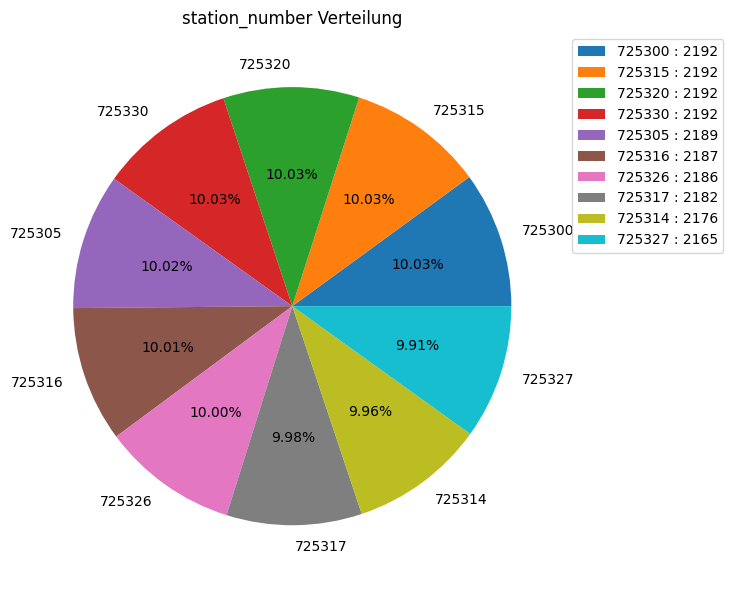

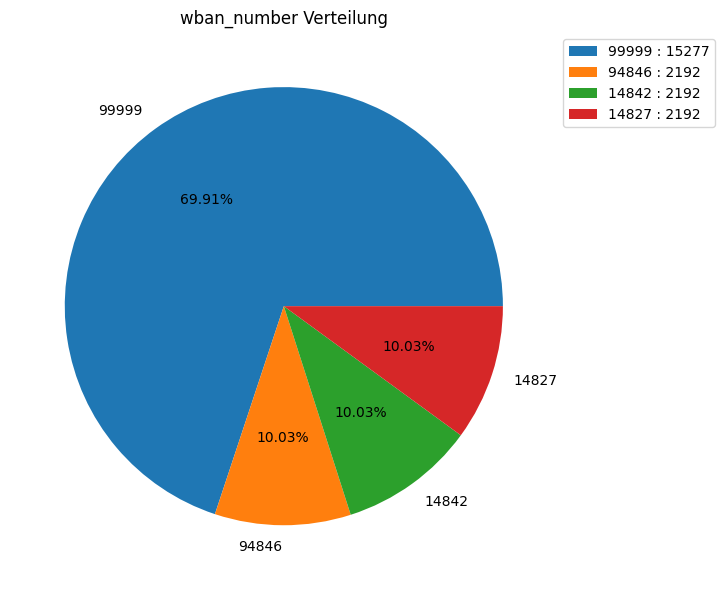

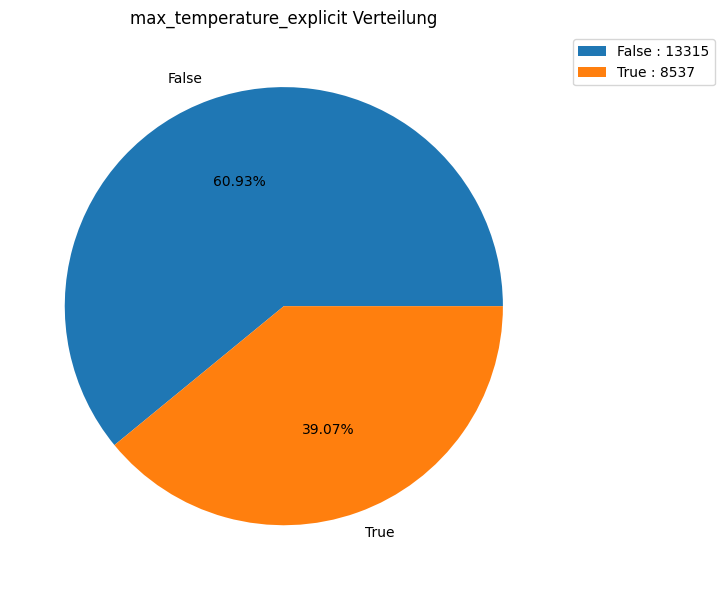

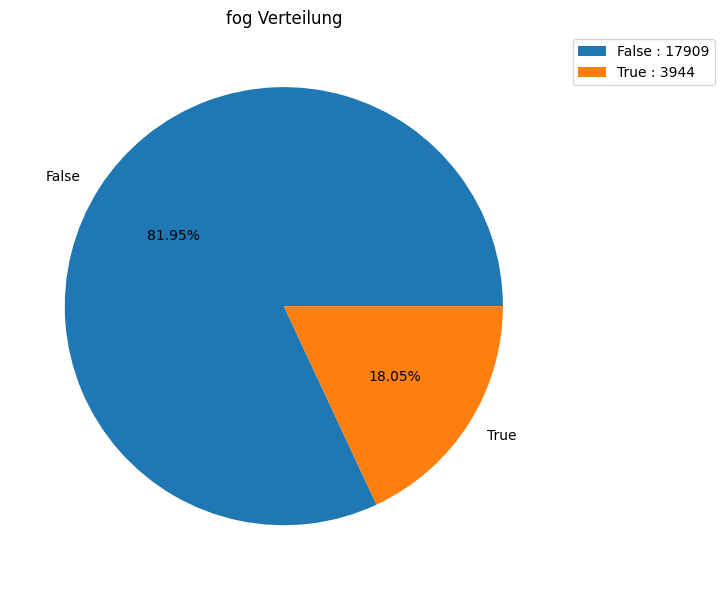

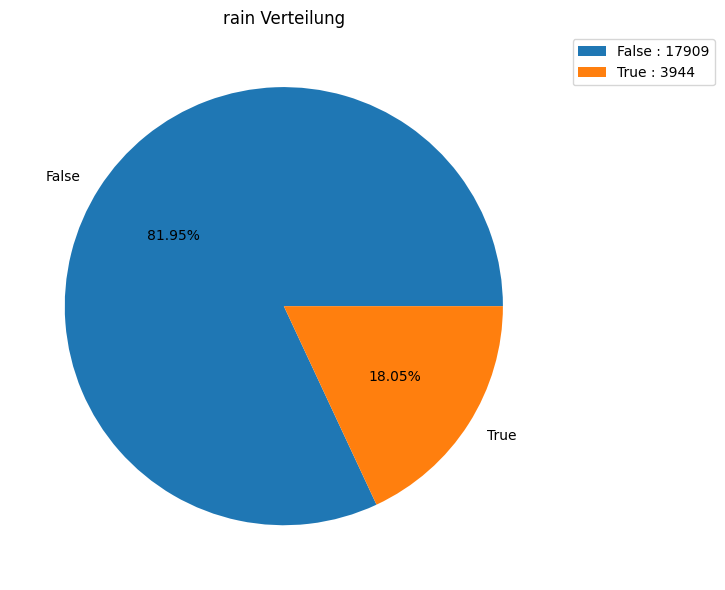

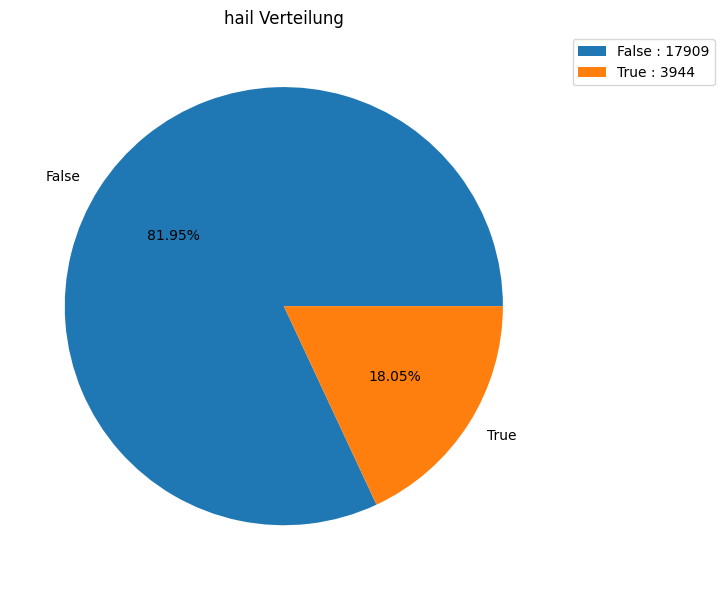

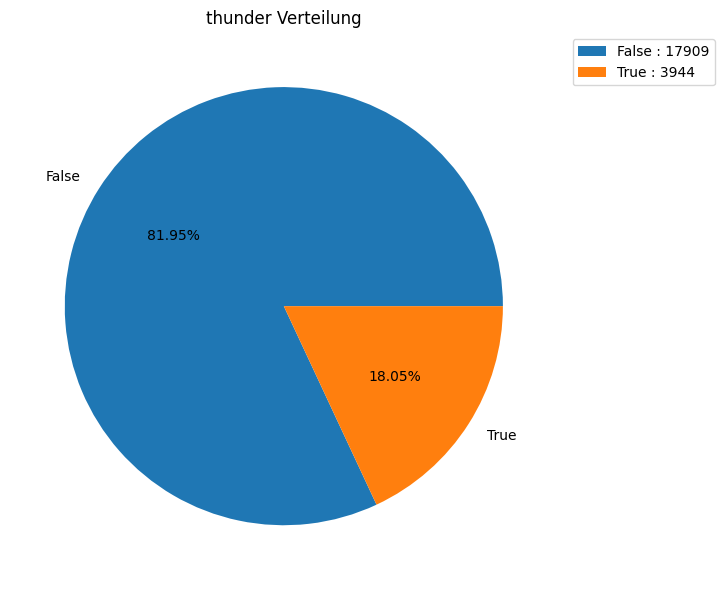

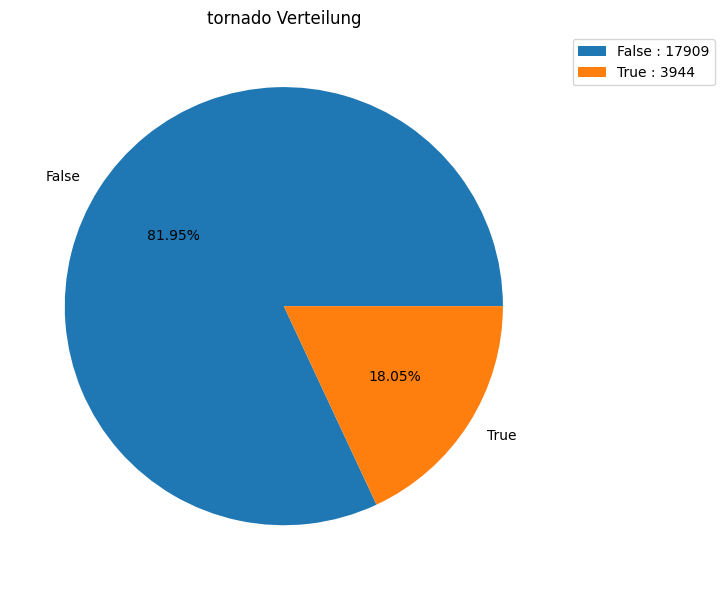

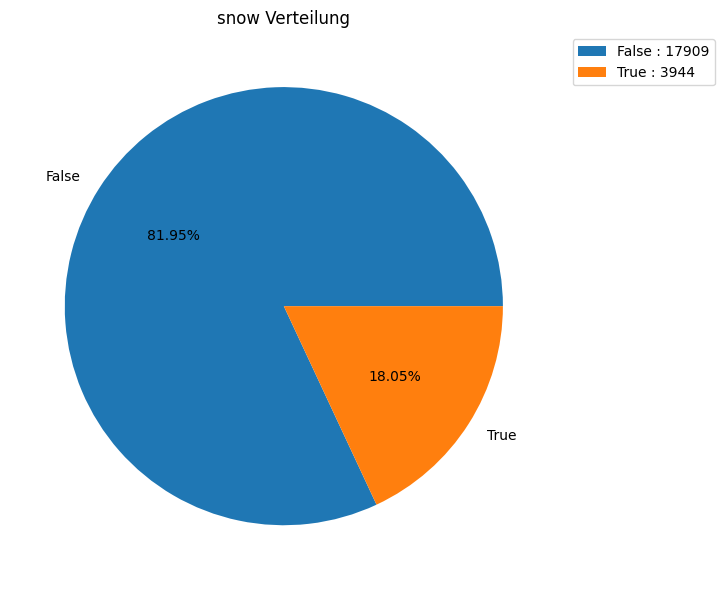

In [862]:
#Modification Source:Chat GTP
columns_to_plot = [
    'station_number', 'wban_number', 'max_temperature_explicit',
    'fog', 'rain', 'hail', 'thunder', 'tornado','snow'
]

for col in columns_to_plot:
    fig, ax = plt.subplots(figsize=(8, 6))  # kleinere Größe pro Diagramm

    # Zähle die Werte
    value_counts = df[col].value_counts()

    # Pie Chart zeichnen
    pie_chart = value_counts.plot(
        kind='pie', autopct='%1.2f%%', legend=False, ax=ax
    )

    # Individuelle Legende mit Werten
    legend_labels = [f'{value} : {count}' for value, count in zip(value_counts.index, value_counts)]
    ax.legend(legend_labels, loc="upper right", bbox_to_anchor=(1.3, 1))

    # Titel setzen
    ax.set_title(f"{col} Verteilung")

    # Y-Achsenbeschriftung bei Pie-Charts ausblenden
    ax.set_ylabel('')

    plt.tight_layout()


- Station_number,wban_number und max_temperature_expliciti sind fast balanced verteilt
- Aber fog,rain,hail,thunder ,tornado sind ungleich verteilt
- Insbesonders das Klassen label "snow" ist unbalanced
- -> In anderen Worte ein Class Imbalance Problem ist vorhanden, da wenige Samples vorhanden sind , wo es an dem Tag geschneit hat

# Überprüfen ob Duplikate vorhanden sind

In [863]:
df[df.duplicated()]
# keine Duplikate vorhanden

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,snow_depth_change


# Spalten löschen die vom ersten Blick redudant sind

In [864]:
df = df.drop(columns=["date"]) 
# ich hatte die wahl zwischen day, year month zulöschen oder date 
# -> am Ende habe ich mich für date entschieden

# Überprüfung welche Spalten NAs beinhalten

In [865]:
df.isnull().sum()

station_number                            0
wban_number                               0
year                                      0
month                                     0
day                                       0
mean_temp                                 0
num_mean_temp_samples                     0
mean_dew_point                            7
num_mean_dew_point_samples                7
mean_sealevel_pressure                 2587
num_mean_sealevel_pressure_samples     2587
mean_station_pressure                 20254
num_mean_station_pressure_samples     20254
mean_visibility                          16
num_mean_visibility_samples              16
mean_wind_speed                           7
num_mean_wind_speed_samples               7
max_sustained_wind_speed                  8
max_gust_wind_speed                    9465
max_temperature                           1
max_temperature_explicit                  1
min_temperature                       21853
min_temperature_explicit        

In [866]:
df.isnull().mean() * 100
#Wieviel % in der jeweiligen Spalte Nas sind

station_number                          0.000000
wban_number                             0.000000
year                                    0.000000
month                                   0.000000
day                                     0.000000
mean_temp                               0.000000
num_mean_temp_samples                   0.000000
mean_dew_point                          0.032032
num_mean_dew_point_samples              0.032032
mean_sealevel_pressure                 11.838192
num_mean_sealevel_pressure_samples     11.838192
mean_station_pressure                  92.682927
num_mean_station_pressure_samples      92.682927
mean_visibility                         0.073216
num_mean_visibility_samples             0.073216
mean_wind_speed                         0.032032
num_mean_wind_speed_samples             0.032032
max_sustained_wind_speed                0.036608
max_gust_wind_speed                    43.312131
max_temperature                         0.004576
max_temperature_expl

- manche Spalten haben nur paar Nas, wohingegen andere Spalte fast nur aus Nas bestehen
- -> diese sind nicht lohnenswert und können gelöscht werden

# Spalten löschen die mind 40% nur aus NAs bestehen

In [867]:
df = df.drop(columns=["mean_station_pressure","num_mean_station_pressure_samples","max_gust_wind_speed","min_temperature","min_temperature_explicit","snow_depth","snow_depth_change"])

- auch wenn snow_depth","snow_depth_change relevant sein könnten, bezüglich des Klassenlabels , waren einfach zu viele NAs, sodas ich die gelöscht habe

# Prüfen wie die Verteilung für alle numerischen Features aussieht, bei denen NAs sind

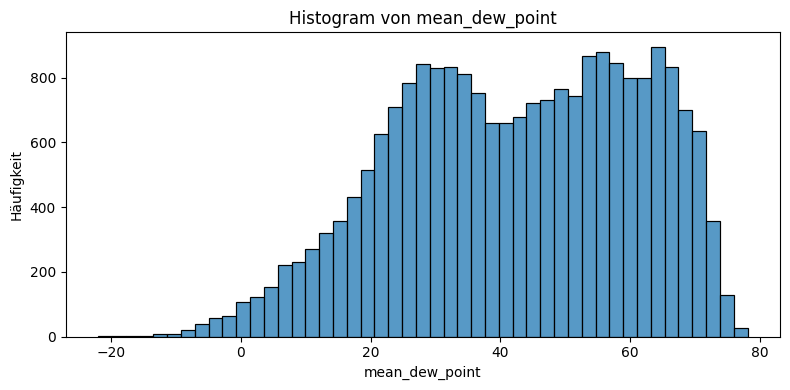

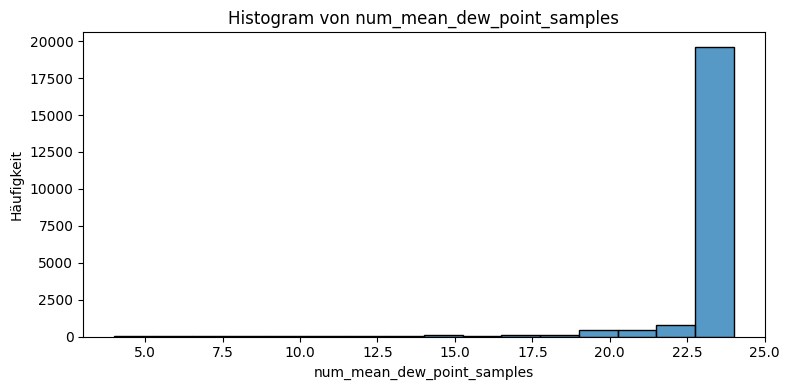

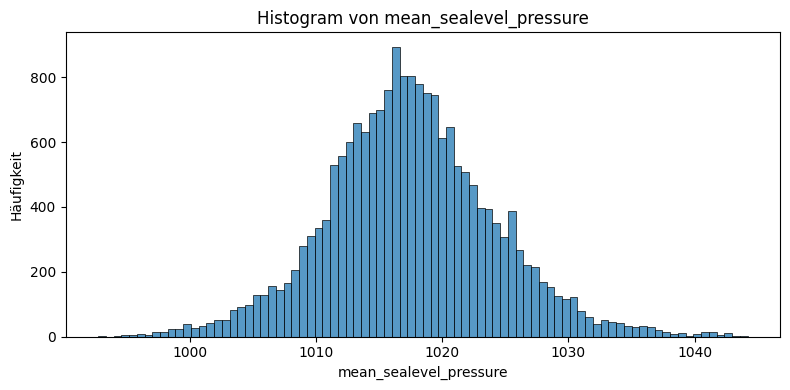

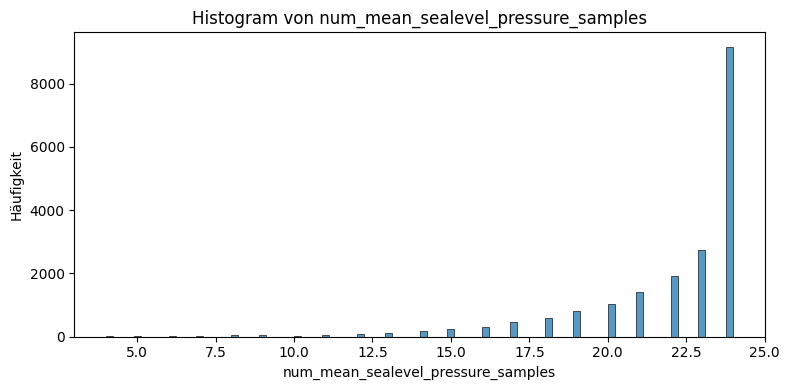

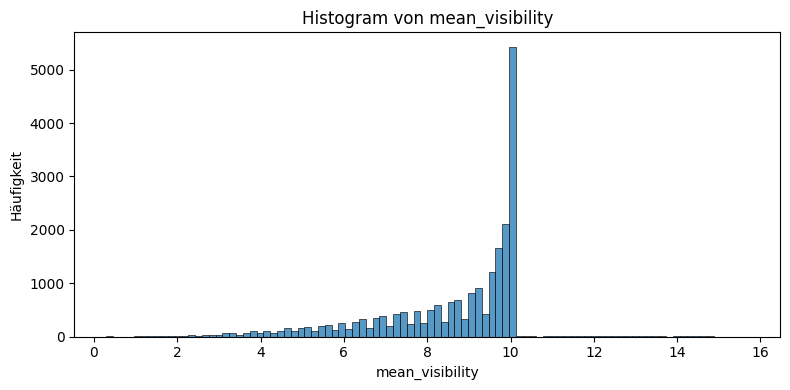

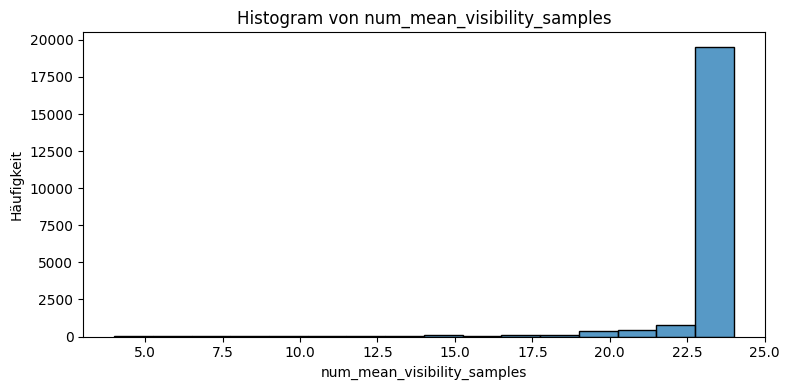

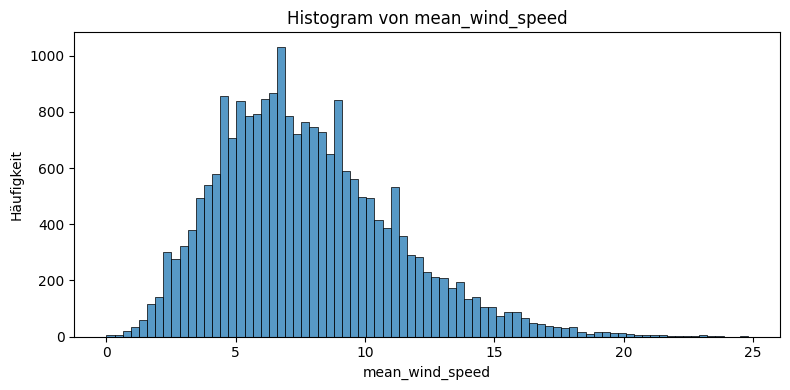

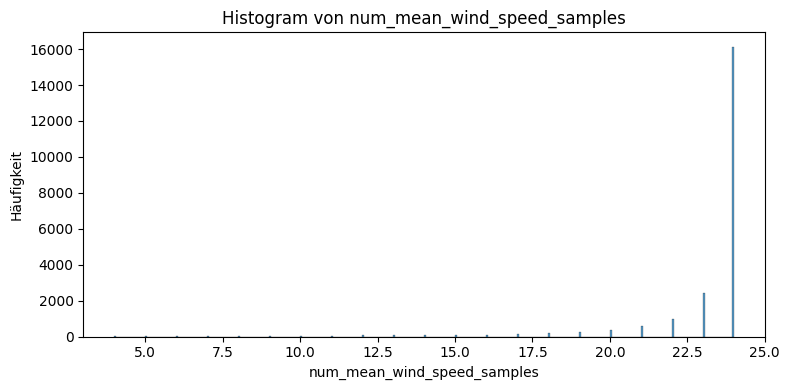

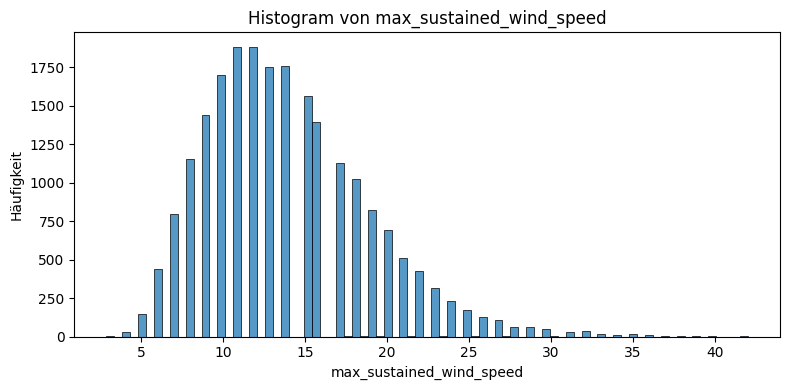

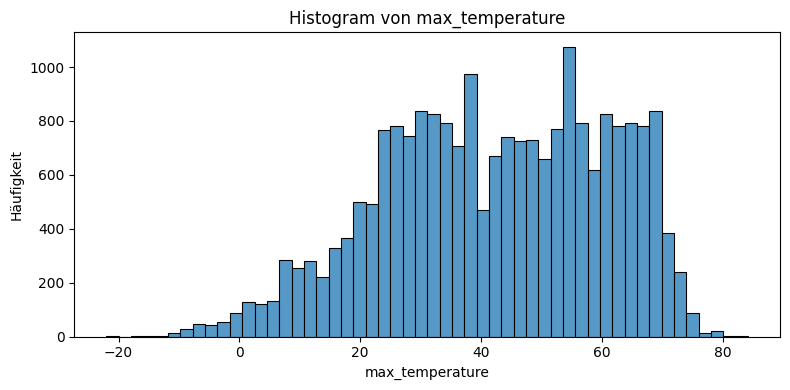

In [868]:
val=[
    "mean_dew_point",
    "num_mean_dew_point_samples",
    "mean_sealevel_pressure",
    "num_mean_sealevel_pressure_samples",
    "mean_visibility",
    "num_mean_visibility_samples",
    "mean_wind_speed",
    "num_mean_wind_speed_samples",
    "max_sustained_wind_speed",
    "max_temperature"
]

for col in val:
    plt.figure(figsize=(8, 4))  
    sns.histplot(data=df, x=col)  
    plt.title(f"Histogram von {col}")
    plt.xlabel(col)
    plt.ylabel("Häufigkeit")
    plt.tight_layout()

    
    
    

- Wenn es eine Normalverteilung hat ist es lohnenwert eine mean inputation zu machen
- Bei einer Verteilung mit vielen ausreißern ist es besser die median inputation zu nutzen

# Countplot für max_temperature_explicit separiert nach Snow

<Axes: xlabel='max_temperature_explicit', ylabel='count'>

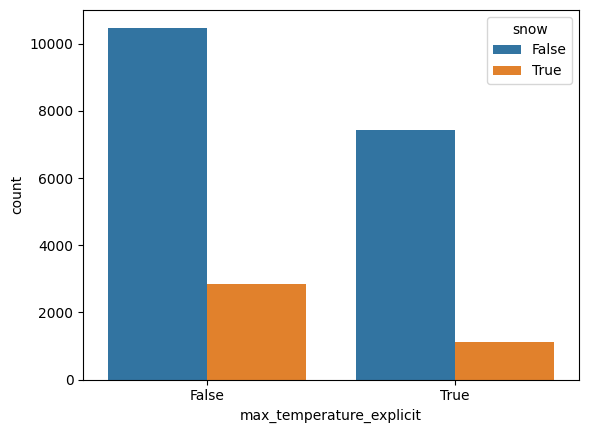

In [869]:
sns.countplot(df, x="max_temperature_explicit",hue="snow")

# Scatterplot für total_preciption seperiert nach Snow

Text(0.5, 1.0, 'Alle Werte für total_precipitation seperiert nach den beiden Kategorien als Scatter plot')

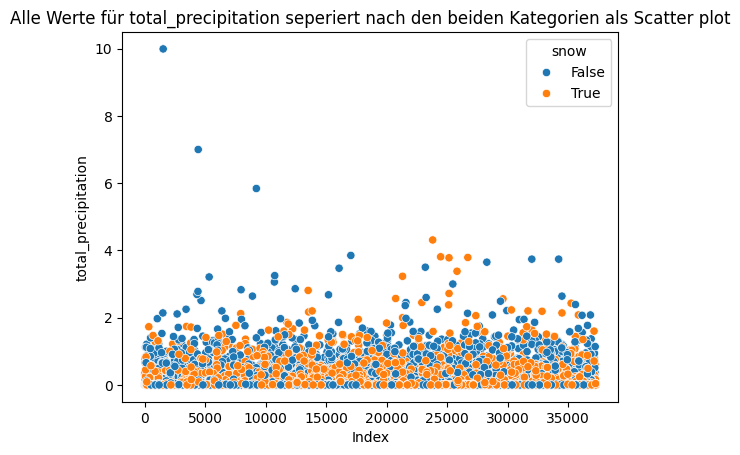

In [870]:
sns.scatterplot(x=df.index, y='total_precipitation', data=df,hue="snow")
plt.xlabel('Index')
plt.ylabel('total_precipitation')
plt.title('Alle Werte für total_precipitation seperiert nach den beiden Kategorien als Scatter plot')

- mehrere Ausreißer vorhanden die das Model beeinflussen könnten und viele Werte die Null sind

In [871]:
df["total_precipitation"].value_counts()

total_precipitation
0.00    14253
0.01     1278
0.03      538
0.02      522
0.04      312
        ...  
1.85        1
1.87        1
2.21        1
2.56        1
2.57        1
Name: count, Length: 234, dtype: int64

# Preprocessing total_precipitation

- Es gibt zwei Möglichkeiten mit diesen Feature umzugehen
- 1. : Logarithmieren ( um die großen ausreißer kleienr zu machen) und dann NAs füllen mit mean oder Median
- 2. : in binär umzuwandeln ( alles was 0 hat ist False und alles was über 0 ist ist True)
- -> Es wurde sich für die binär variante entschieden und gleichzeitig werden NA werte mit mit dem Mode ersetzte(also was am häufigsten vorkommt)

In [872]:
def binary_total_precipitation(value):
    if value > 0:
        return True
    else:
        return False

#Werte die mehr als 0 haben werden mit False umgeschrieben und werte die über 0 sind werden als True umgeschrieben
df["total_precipitation"] = df["total_precipitation"].apply(binary_total_precipitation)

In [873]:
df["total_precipitation"].value_counts()

total_precipitation
False    14549
True      7304
Name: count, dtype: int64

# Zeilen löschen wo weniger als 1 % nur NAs sind 

- es sollen alle Zeilen gelöscht werden die weniger als 1% NAs in den jeweiligen Feature beinhalten
- Risiko: Zeilen werden rausgelöschen die auch die Klasse True haben( da es so wenige sind hat es kein riesen impact)

In [874]:
df = df.dropna(subset=['mean_dew_point', 'num_mean_dew_point_samples', 'mean_visibility',"mean_wind_speed","num_mean_wind_speed_samples","max_sustained_wind_speed","max_sustained_wind_speed","max_temperature","max_temperature_explicit"])

# Die Spalte mean_sealevel_pressure wo NAs vorhanden sind mit mean füllen

In [875]:
df['mean_sealevel_pressure']=df['mean_sealevel_pressure'].fillna((df['mean_sealevel_pressure'].mean()))

# Die Spalte num_mean_sealevel_pressure_samples wo NAs vorhanden sind mit median füllen 

In [876]:
df['num_mean_sealevel_pressure_samples']=df['num_mean_sealevel_pressure_samples'].fillna((df['num_mean_sealevel_pressure_samples'].median()))

In [877]:
df.isnull().mean() * 100

station_number                        0.0
wban_number                           0.0
year                                  0.0
month                                 0.0
day                                   0.0
mean_temp                             0.0
num_mean_temp_samples                 0.0
mean_dew_point                        0.0
num_mean_dew_point_samples            0.0
mean_sealevel_pressure                0.0
num_mean_sealevel_pressure_samples    0.0
mean_visibility                       0.0
num_mean_visibility_samples           0.0
mean_wind_speed                       0.0
num_mean_wind_speed_samples           0.0
max_sustained_wind_speed              0.0
max_temperature                       0.0
max_temperature_explicit              0.0
total_precipitation                   0.0
fog                                   0.0
rain                                  0.0
snow                                  0.0
hail                                  0.0
thunder                           

# -- Find out which Feature are relevant for the classification and which Features can be dropped as reduction --

# Correlations Plot

<Axes: >

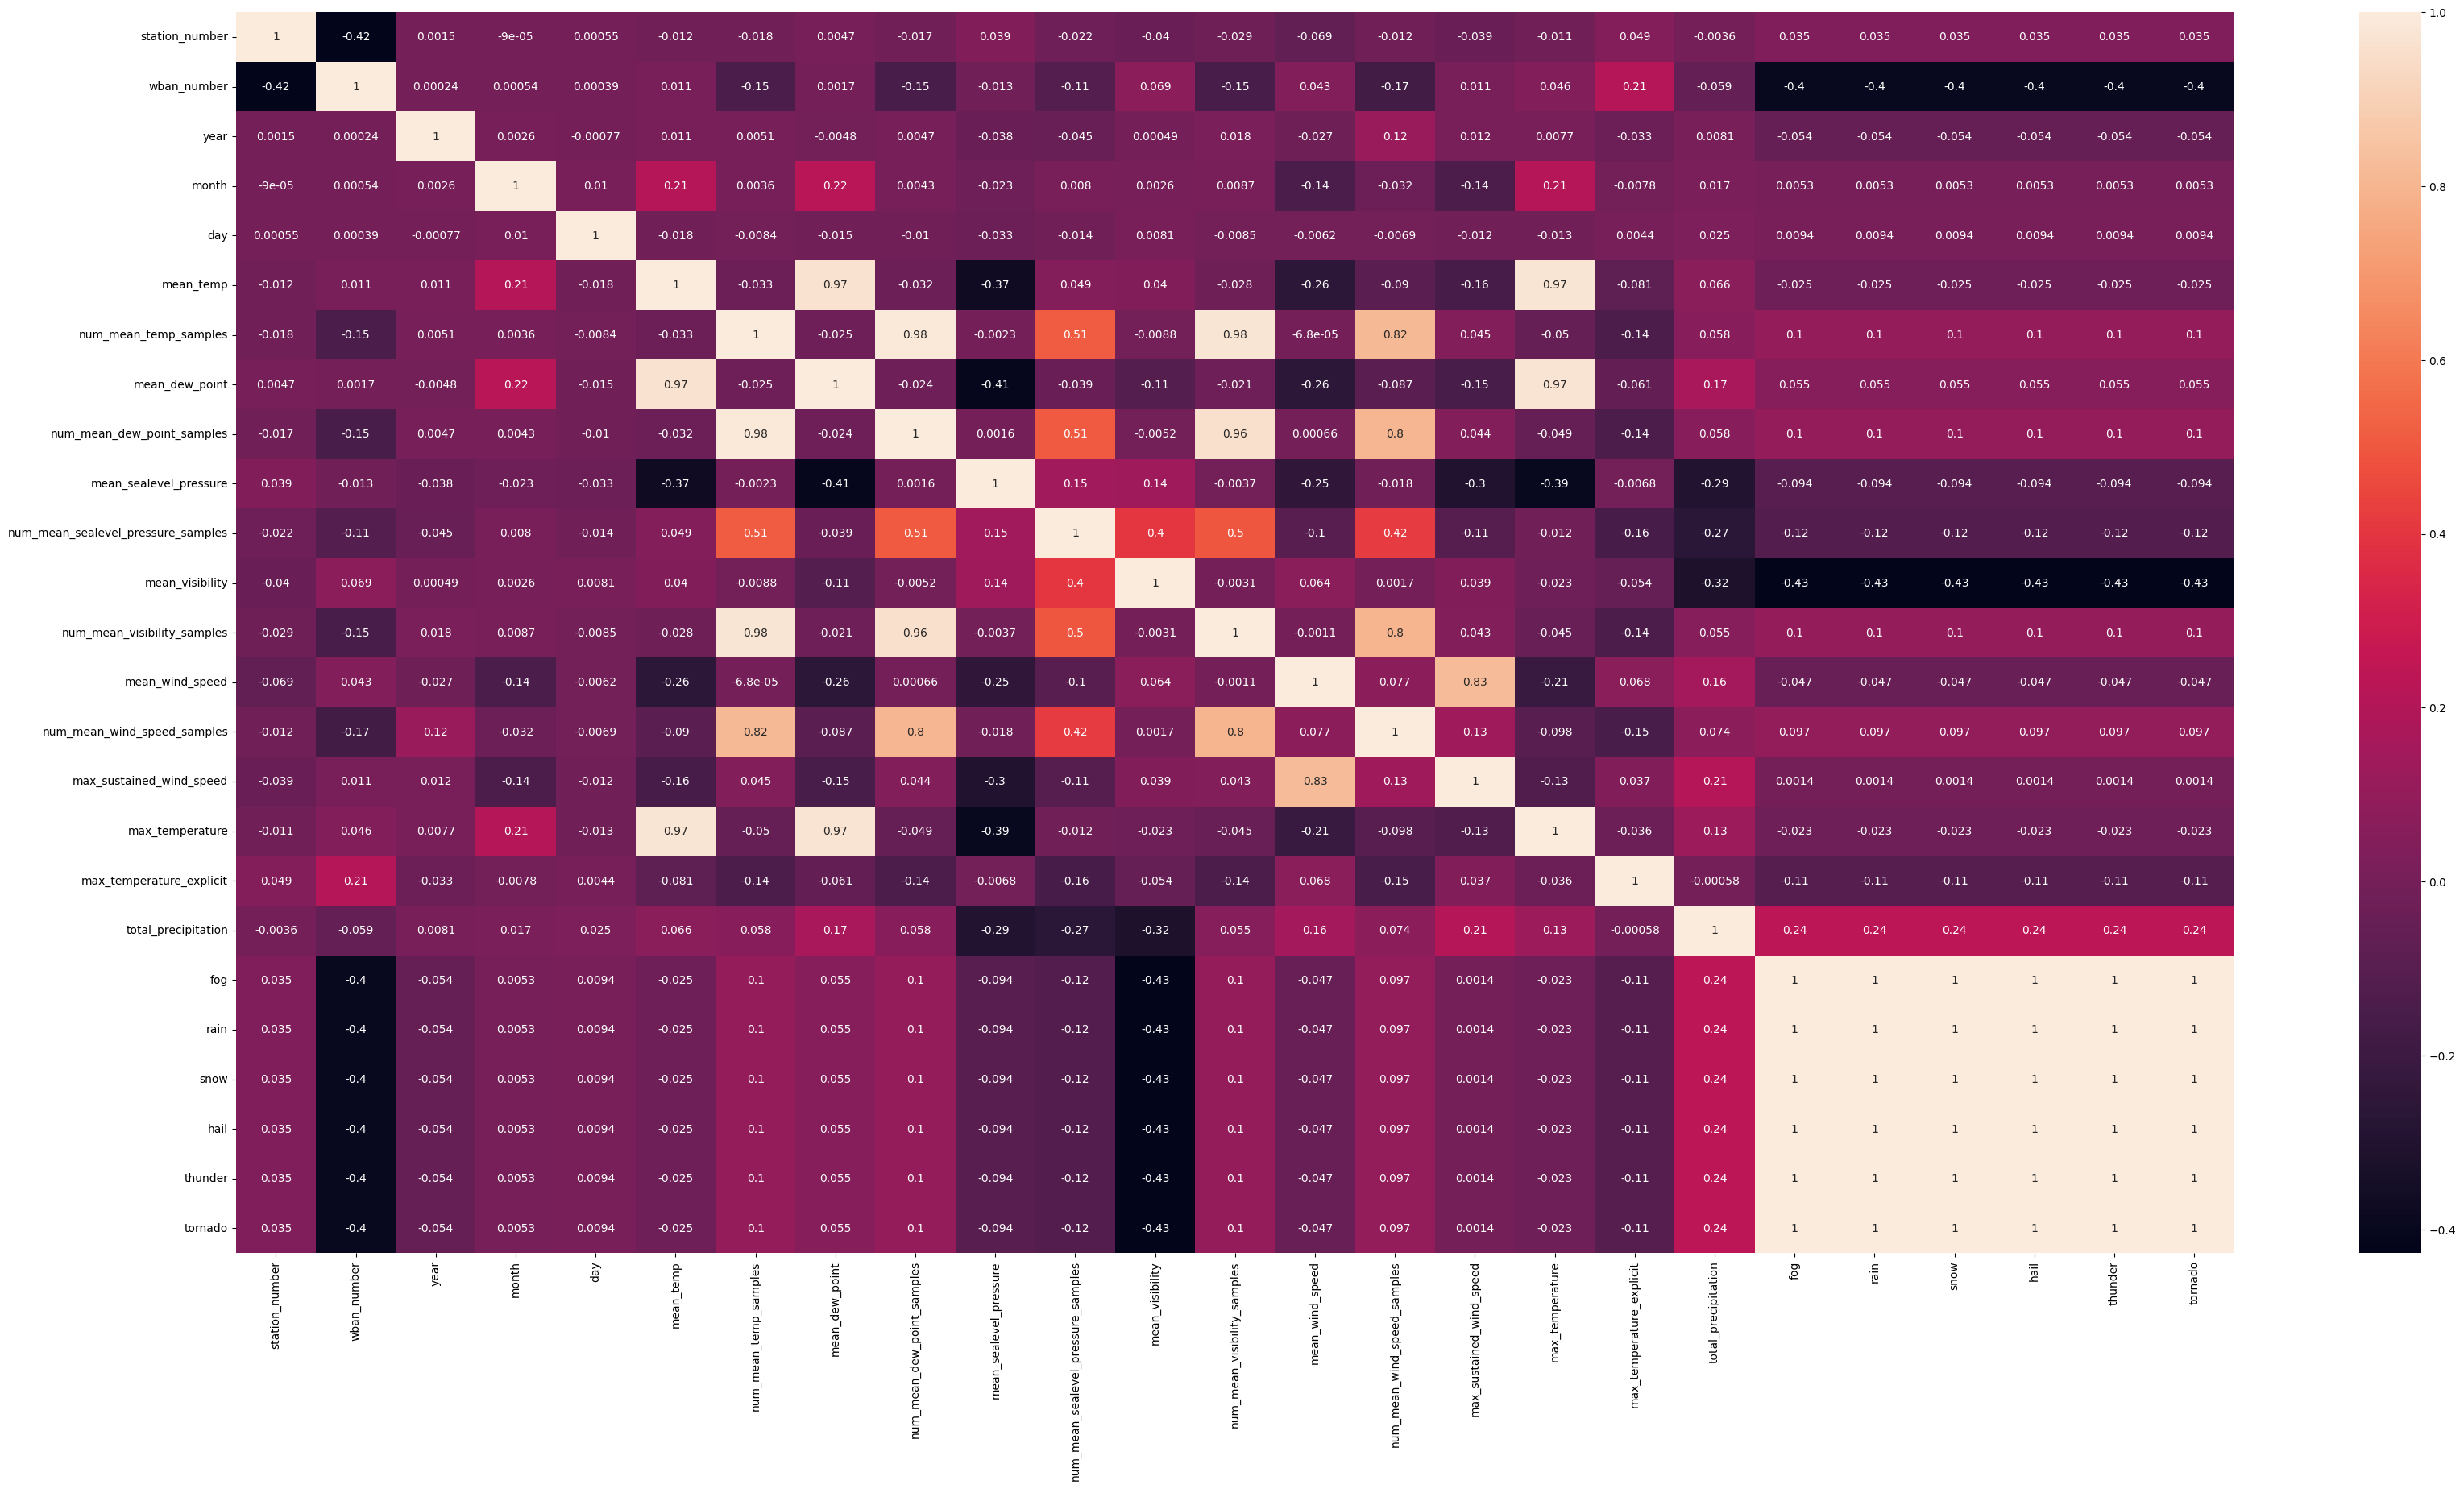

In [878]:
# calculate the correlation matrix
fig = plt.figure(figsize=(40,20))
corr = df.corr()
# plot the heatmap
sns.heatmap(corr,annot=True,xticklabels=corr.columns,yticklabels=corr.columns)

# Löschen von Features die anhand des Koorelationsplots nicht so relevant sind

- ich hab mich entschieden mich auf features zu fokuzieren die eine koorelation von 0.5 oder höher sind
- Theoretisch müsste ich alle Koorelation die 1 miteinander haben raus werfen 
- -> da die alle aber mit dem Klassenlabel eine koorelation von 1 haben und die mit den anderen Features immer die selben koorelation haben, habe ich mich entschieden nur den feature fog zu lassen

In [879]:
redudante_features = ["rain","hail","thunder","tornado","fog",
    'num_mean_temp_samples',
    'num_mean_dew_point_samples',
    'num_mean_visibility_samples',
    'num_mean_wind_speed_samples',
    'max_temperature',
    'max_sustained_wind_speed',
]
df = df.drop(columns=redudante_features)


### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

# One - hot encoding

- Damit das Model eine Bessere Performence kriegt wurde entschieden für die Kategorischen Variablen noch zusätzlich One- hot encoding anzuwenden um so den Datensatz zu erweitern

In [880]:
df= pd.get_dummies(df,prefix=['station_number'], columns = ['station_number'], drop_first=True)
df= pd.get_dummies(df,prefix=['wban_number'], columns = ['wban_number'], drop_first=True)

# -- Train, Evaluate und Test des Models --

- Ansatz ist das der Algorithmus auf zwei verschiedenen Arten trainiert, evaluiert/getuned und getested wird
- -> einmal mit Feature selection und einmal ohne
- Ausgewähltes Model: Decision tree
- -> Grund: Model ist einfach zu interpretieren und kann mit großen Daten gut umgehen

# Label vom Datensatz trennen

In [881]:
df_y = df['snow']
df_x = df.drop(columns=["snow"]) #Labels / vorhersage werte werden gelöscht aus dem Trainingsdatensatz
df_x


,year,month,day,mean_temp,mean_dew_point,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,mean_wind_speed,max_temperature_explicit,total_precipitation,station_number_725305,station_number_725314,station_number_725315,station_number_725316,station_number_725317,station_number_725320,station_number_725326,station_number_725327,station_number_725330,wban_number_14842,wban_number_94846,wban_number_99999
9787,2000,1,1,38.400002,29.700001,1015.700012,24.0,9.8,6.8,False,False,False,False,False,False,False,False,False,False,False,False,True,False
6583,2000,1,2,47.799999,42.299999,1006.400024,23.0,7.7,10.2,False,True,False,False,False,False,False,False,False,False,False,False,True,False
9797,2000,1,3,37.500000,34.099998,1011.099976,24.0,7.2,11.3,True,True,False,False,False,False,False,False,False,False,False,False,True,False
11031,2000,1,4,29.700001,25.900000,1008.700012,24.0,7.0,12.3,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4638,2000,1,5,20.400000,16.500000,1025.199951,24.0,8.7,8.1,True,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,2005,12,27,34.900002,30.799999,1011.799988,24.0,7.2,8.4,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9622,2005,12,28,42.500000,40.099998,999.700012,13.0,4.3,4.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False
34640,2005,12,29,36.799999,34.200001,1002.400024,23.0,7.5,9.5,False,True,False,False,False,False,False,False,False,False,True,False,False,False
9652,2005,12,30,35.500000,31.700001,1011.700012,21.0,6.8,6.3,True,False,False,False,False,False,False,False,False,False,True,False,False,False


# Daten in Train, Validate und Test splitten

In [882]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.30, random_state=42)

## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

# Train and Hyperparameter tuning

- es wird hier Trainiert und gleichzeitig den Hyperparater getuned  mit dem Trainingsdatensatz mit 5 folg cross validation
- der Parameter ist die tiefe des Baums ( zwischen 1-54)
- genaue beschreibung wie das treainieren, tunen funktioniert wird in einer seperaten PDF erklärt

In [883]:
max_depth_range=list(range(1,54))
cv = KFold(n_splits=5,)  
list_scores = []
list_stds= []
for md in max_depth_range:
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=md) # Model definiert
    scores = cross_val_score(clf_tree ,X_train, y_train, scoring='accuracy', cv=cv)
    print('Train Accuracy:%d %.3f (%.3f)' % (md,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)

Train Accuracy:1 0.821 (0.006)
Train Accuracy:2 0.908 (0.004)
Train Accuracy:3 0.911 (0.005)
Train Accuracy:4 0.930 (0.003)
Train Accuracy:5 0.931 (0.003)
Train Accuracy:6 0.931 (0.002)
Train Accuracy:7 0.928 (0.005)
Train Accuracy:8 0.926 (0.005)
Train Accuracy:9 0.924 (0.005)
Train Accuracy:10 0.923 (0.006)
Train Accuracy:11 0.920 (0.007)
Train Accuracy:12 0.919 (0.006)
Train Accuracy:13 0.913 (0.008)
Train Accuracy:14 0.912 (0.008)
Train Accuracy:15 0.911 (0.009)
Train Accuracy:16 0.908 (0.007)
Train Accuracy:17 0.907 (0.007)
Train Accuracy:18 0.909 (0.006)
Train Accuracy:19 0.907 (0.006)
Train Accuracy:20 0.907 (0.008)
Train Accuracy:21 0.908 (0.007)
Train Accuracy:22 0.906 (0.008)
Train Accuracy:23 0.905 (0.006)
Train Accuracy:24 0.906 (0.008)
Train Accuracy:25 0.908 (0.007)
Train Accuracy:26 0.908 (0.007)
Train Accuracy:27 0.907 (0.007)
Train Accuracy:28 0.906 (0.006)
Train Accuracy:29 0.908 (0.006)
Train Accuracy:30 0.907 (0.008)
Train Accuracy:31 0.907 (0.007)
Train Accuracy:32

Text(0, 0.5, 'Cross-Validated Accuracy')

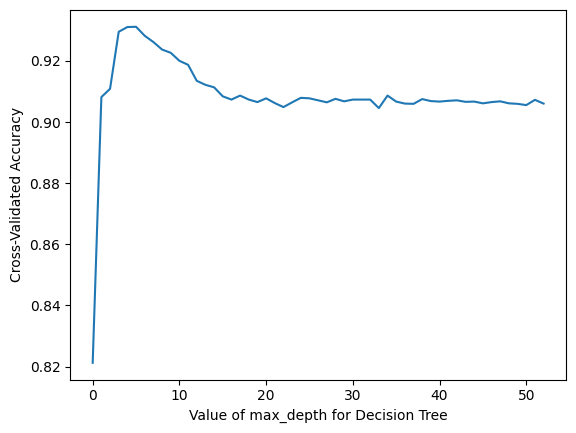

In [884]:
plt.plot(list(range(53)),list_scores)
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

- Laut dem 5- fold cross validation ist die beste tiefe 5

# Validate the Model

In [885]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5) # Model definiert
clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_valid)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))
#max_depth=höhe des baumes 5 ausgewählt

Validation Accuracy: 0.924


- laut dem validieren ist die Acc von mit diesen Parameter bei über 92%

# Test the Model

- nun nehmen wir das Model und versuchen auf unbekannten Daten das Trainierte Model zu testen

In [886]:
predictions = clf_tree.predict(X_test)

# Evaluation

- Die Performence dieses Models wurde neben ACC noch mit den Metriken Precision, Recall und dem F1 Score evaluiert
- F1 Score wurde ausgewählt da es eien gute Metrik ist für die Evaluierung von Modellen die als Datengrundlage ein Unbalanced Datensatz haben

In [887]:
acc_score = accuracy_score(y_test,predictions)  
print ("Test Accuracy: %.3f" % (acc_score))
print()
print ("Confusion Matrix: \n " , confusion_matrix(y_test,predictions))
print()
print("Precision: %.3f" % (metrics.precision_score(y_test,predictions)))
print("Recall: %.3f" % (metrics.recall_score(y_test,predictions)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_test,predictions)))

Test Accuracy: 0.933

Confusion Matrix: 
  [[3504   67]
 [ 224  570]]

Precision: 0.895
Recall: 0.718
F-1-Score: 0.797


- Mit einen F1 Score von 0,797 sind wir nicht im besten Bereich der Klassifikation,aber haben trotzden einen solides Model

              precision    recall  f1-score   support

       False       0.94      0.98      0.96      3571
        True       0.89      0.72      0.80       794

    accuracy                           0.93      4365
   macro avg       0.92      0.85      0.88      4365
weighted avg       0.93      0.93      0.93      4365



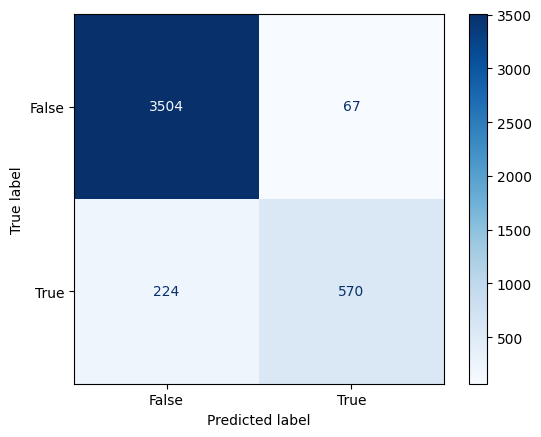

In [888]:
# confusion matrix anzeigen
ConfusionMatrixDisplay.from_estimator(clf_tree, X_test, y_test, cmap=plt.cm.Blues)

# classification report
print(classification_report(y_test, predictions))


- Ebenfalls wurde eine Confusions matrix geplottet die aussagt wieviele Klassen richtig bzw Falsch klassifiziert wurden
- 291 Samples wurden falsch klassifiziert
- wenn man genau es betrachtet wurde von den Klassen die wenig vorhanden ist ( in dem Fall wenn es Schnee fällt oft falsch vorhergesagt)
- -> 28,21 % von der Klasse Falsch klassifiziert was nicht gut ist aber auch nicht sehr schlecht

In [889]:
from sklearn.metrics import roc_curve, auc
y_predict_probabilities = clf_tree.predict_proba(X_test)[:,1]
fpr, tpr, thr = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

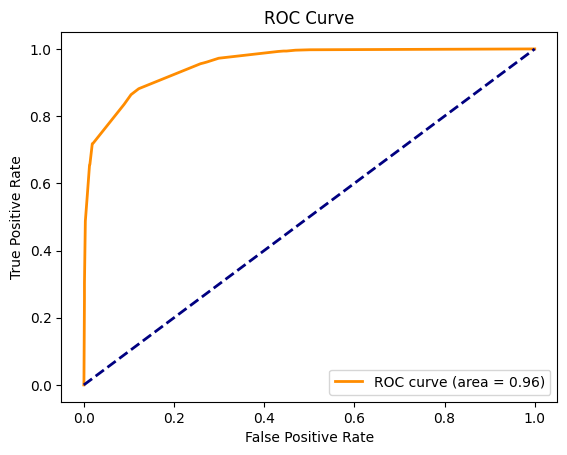

In [890]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

- Eine weitere Metrik die genutz wurde ist die ROC  Kurve
- Je größter die Area under der Curve ( AUC ist), desto besser ist das Model im klassifizieren
- -> mit einer Area von 0,96 ist das Model Laut der Metrik im sehr guten Bereich

# Mit Feature Selection durch tree.feature importances

- nun wird das selbe gemacht nur das wir Vor den Trainieren Feature selction machen um die wichtigsten Features dieses mal zu nutzen
- das wurde mit dem tree.feature importance algo heuraus gefunden

In [891]:
df_y = df['snow']
df_x = df.drop(columns=["snow"]) #Labels / vorhersage werte werden gelöscht aus dem Trainingsdatensatz


In [892]:
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, test_size=.33, random_state=42)

tree = RandomForestClassifier()
tree.fit(X_train, y_train)

importances = tree.feature_importances_

Feature: 0, Score: 0.07216
Feature: 1, Score: 0.03155
Feature: 2, Score: 0.04366
Feature: 3, Score: 0.05862
Feature: 4, Score: 0.05976
Feature: 5, Score: 0.06099
Feature: 6, Score: 0.04950
Feature: 7, Score: 0.25821
Feature: 8, Score: 0.05974
Feature: 9, Score: 0.00915
Feature: 10, Score: 0.02896
Feature: 11, Score: 0.00384
Feature: 12, Score: 0.00404
Feature: 13, Score: 0.00418
Feature: 14, Score: 0.00353
Feature: 15, Score: 0.00438
Feature: 16, Score: 0.01874
Feature: 17, Score: 0.00605
Feature: 18, Score: 0.00381
Feature: 19, Score: 0.04785
Feature: 20, Score: 0.02006
Feature: 21, Score: 0.02654
Feature: 22, Score: 0.12469


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'year'),
  Text(1, 0, 'month'),
  Text(2, 0, 'day'),
  Text(3, 0, 'mean_temp'),
  Text(4, 0, 'mean_dew_point'),
  Text(5, 0, 'mean_sealevel_pressure'),
  Text(6, 0, 'num_mean_sealevel_pressure_samples'),
  Text(7, 0, 'mean_visibility'),
  Text(8, 0, 'mean_wind_speed'),
  Text(9, 0, 'max_temperature_explicit'),
  Text(10, 0, 'total_precipitation'),
  Text(11, 0, 'station_number_725305'),
  Text(12, 0, 'station_number_725314'),
  Text(13, 0, 'station_number_725315'),
  Text(14, 0, 'station_number_725316'),
  Text(15, 0, 'station_number_725317'),
  Text(16, 0, 'station_number_725320'),
  Text(17, 0, 'station_number_725326'),
  Text(18, 0, 'station_number_725327'),
  Text(19, 0, 'station_number_725330'),
  Text(20, 0, 'wban_number_14842'),
  Text(21, 0, 'wban_number_94846'),
  Text(22, 0, 'wban_number_99999')])

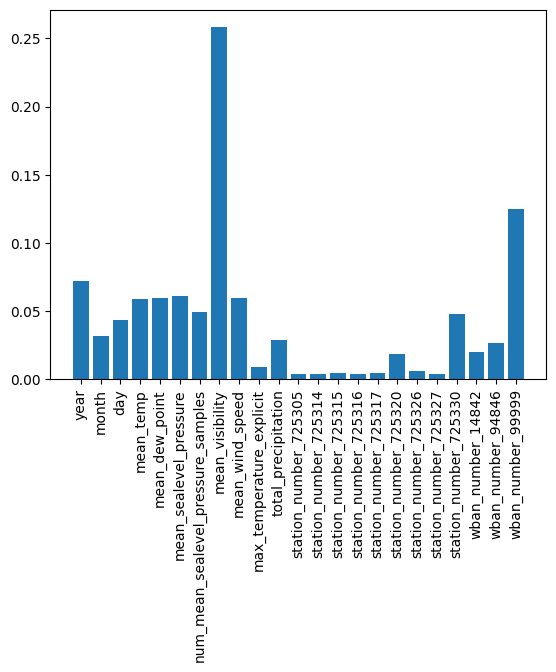

In [893]:
# summarize feature importance
for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importances))], importances)
plt.bar(df_x.columns,importances)
plt.xticks(rotation=90)

In [894]:
features_value, features_name = zip(*sorted(zip(importances, df_x.columns),reverse=True))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'mean_visibility'),
  Text(1, 0, 'wban_number_99999'),
  Text(2, 0, 'year'),
  Text(3, 0, 'mean_sealevel_pressure'),
  Text(4, 0, 'mean_dew_point'),
  Text(5, 0, 'mean_wind_speed'),
  Text(6, 0, 'mean_temp'),
  Text(7, 0, 'num_mean_sealevel_pressure_samples'),
  Text(8, 0, 'station_number_725330'),
  Text(9, 0, 'day'),
  Text(10, 0, 'month'),
  Text(11, 0, 'total_precipitation'),
  Text(12, 0, 'wban_number_94846'),
  Text(13, 0, 'wban_number_14842'),
  Text(14, 0, 'station_number_725320'),
  Text(15, 0, 'max_temperature_explicit'),
  Text(16, 0, 'station_number_725326'),
  Text(17, 0, 'station_number_725317'),
  Text(18, 0, 'station_number_725315'),
  Text(19, 0, 'station_number_725314'),
  Text(20, 0, 'station_number_725305'),
  Text(21, 0, 'station_number_725327'),
  Text(22, 0, 'station_number_725316')])

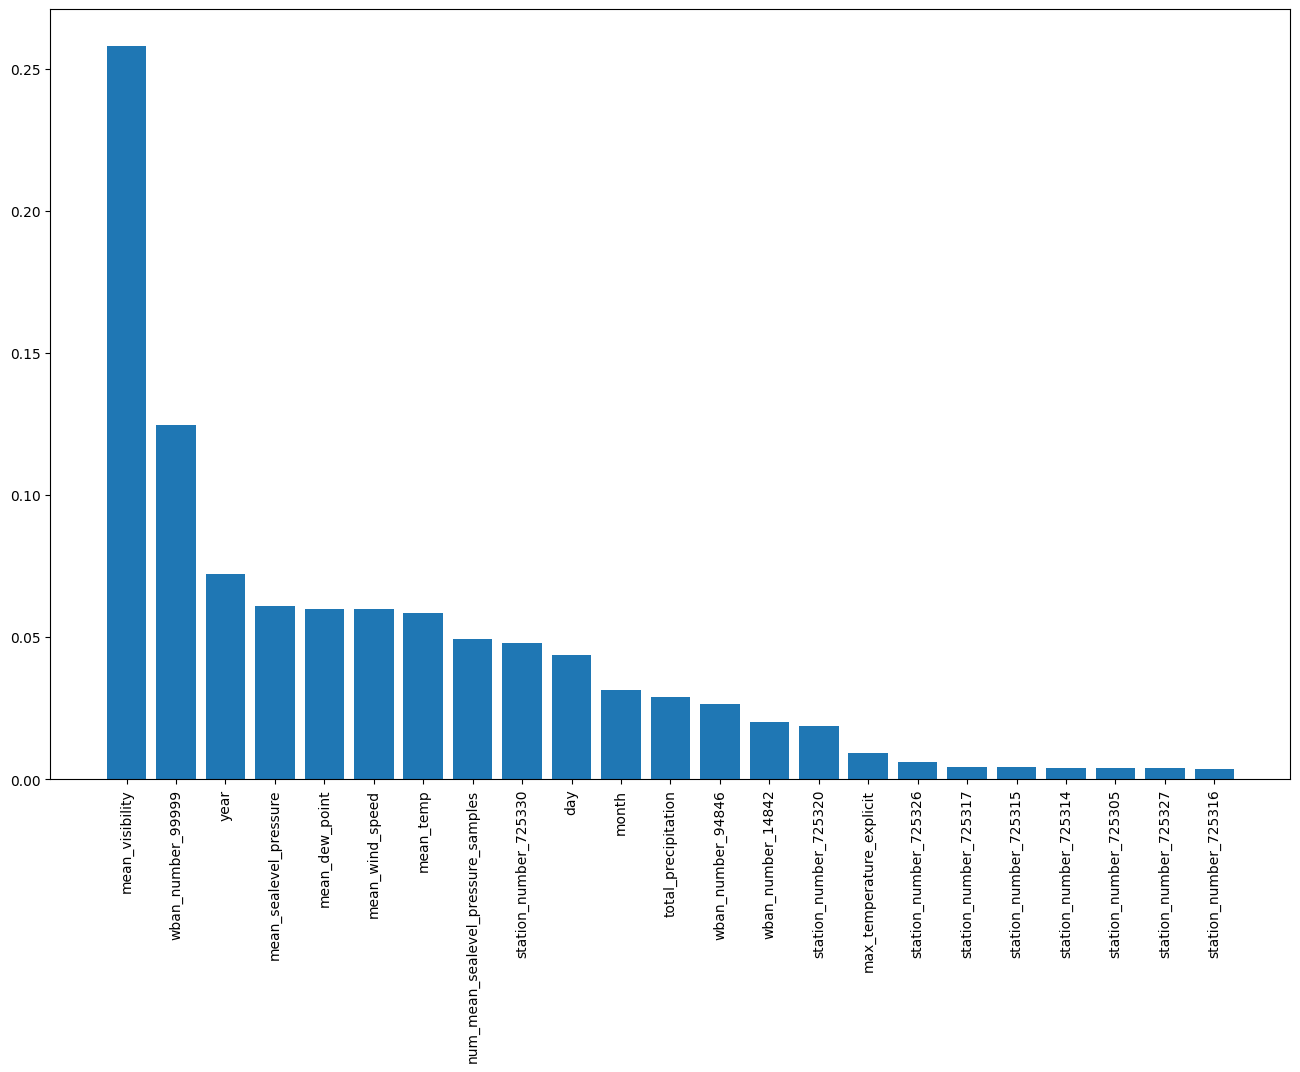

In [895]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
plt.bar(features_name,features_value)
plt.xticks(rotation=90)

- es wurde entschieden die Featuresn zu wählen die den score von mind. 0.05 haben

# Speichern der wichtigsten Features

In [896]:
important_features= features_name[:8]
important_features=list(important_features)
print(important_features)
print(type(important_features))

['mean_visibility', 'wban_number_99999', 'year', 'mean_sealevel_pressure', 'mean_dew_point', 'mean_wind_speed', 'mean_temp', 'num_mean_sealevel_pressure_samples']
<class 'list'>


# Train, Evaluate und Test split

In [897]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.30, random_state=42)

# Wichtige Features in den Datensätzen integrieren

In [ ]:
X_train_features = X_train[important_features]
X_valid_features = X_valid[important_features]
X_test_features = X_test[important_features]

# Train and Tune

In [899]:
max_depth_range=list(range(1,54))
cv = KFold(n_splits=5,)  
list_scores = []
list_stds= []
for md in max_depth_range:
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=md) 
    scores = cross_val_score(clf_tree ,X_train_features, y_train, scoring='accuracy', cv=cv)
    print('Train Accuracy:%d %.3f (%.3f)' % (md,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)

Train Accuracy:1 0.821 (0.006)
Train Accuracy:2 0.908 (0.004)
Train Accuracy:3 0.911 (0.005)
Train Accuracy:4 0.931 (0.003)
Train Accuracy:5 0.930 (0.003)
Train Accuracy:6 0.930 (0.003)
Train Accuracy:7 0.929 (0.003)
Train Accuracy:8 0.925 (0.005)
Train Accuracy:9 0.922 (0.006)
Train Accuracy:10 0.918 (0.006)
Train Accuracy:11 0.915 (0.005)
Train Accuracy:12 0.912 (0.008)
Train Accuracy:13 0.907 (0.006)
Train Accuracy:14 0.908 (0.007)
Train Accuracy:15 0.905 (0.007)
Train Accuracy:16 0.905 (0.005)
Train Accuracy:17 0.903 (0.007)
Train Accuracy:18 0.902 (0.008)
Train Accuracy:19 0.902 (0.004)
Train Accuracy:20 0.902 (0.006)
Train Accuracy:21 0.902 (0.007)
Train Accuracy:22 0.902 (0.008)
Train Accuracy:23 0.901 (0.006)
Train Accuracy:24 0.901 (0.007)
Train Accuracy:25 0.901 (0.006)
Train Accuracy:26 0.901 (0.005)
Train Accuracy:27 0.903 (0.005)
Train Accuracy:28 0.902 (0.006)
Train Accuracy:29 0.901 (0.006)
Train Accuracy:30 0.901 (0.006)
Train Accuracy:31 0.901 (0.007)
Train Accuracy:32

# Cross validation tune  Evaluation

Text(0, 0.5, 'Cross-Validated Accuracy')

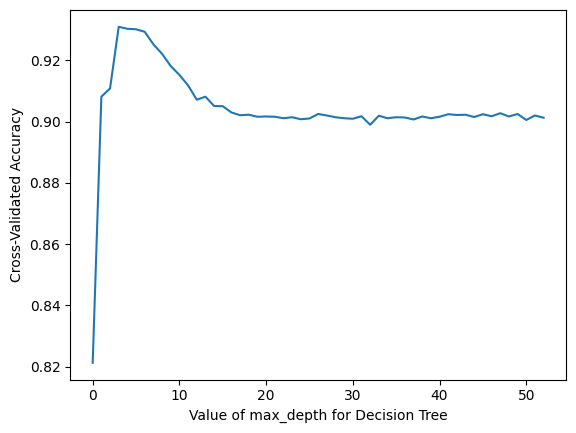

In [900]:
plt.plot(list(range(53)),list_scores)
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

In [901]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf_tree.fit(X_valid_features, y_valid)
y_pred = clf_tree.predict(X_valid_features)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))

Validation Accuracy: 0.931


In [ ]:
print ("Confusion Matrix: \n " , confusion_matrix(y_valid,y_pred))
print()
print("Precision: %.3f" % (metrics.precision_score(y_valid, y_pred)))
print("Recall: %.3f" % (metrics.recall_score(y_valid, y_pred)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_valid, y_pred)))
# Nicht relevant nur zum schauen

Confusion Matrix: 
  [[4171  105]
 [ 255  706]]

Precision: 0.871
Recall: 0.735
F-1-Score: 0.797


# Model Test

In [903]:
predictions = clf_tree.predict(X_test_features)

# Evaluation

In [904]:
acc_score = accuracy_score(y_test,predictions)  
print ("Test Accuracy: %.3f" % (acc_score))
print()
print ("Confusion Matrix: \n " , confusion_matrix(y_test,predictions))
print()
print("Precision: %.3f" % (metrics.precision_score(y_test,predictions)))
print("Recall: %.3f" % (metrics.recall_score(y_test,predictions)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_test,predictions)))

Test Accuracy: 0.931

Confusion Matrix: 
  [[3497   74]
 [ 228  566]]

Precision: 0.884
Recall: 0.713
F-1-Score: 0.789


- Mit einen F1 Score von 0,789 sind wir nicht im besten Bereich der Klassifikation,aber haben trotzden einen solides Model 
- es ist leicht schlechter geworden aber nur minimal das es kein riesen impact hat

              precision    recall  f1-score   support

       False       0.94      0.98      0.96      3571
        True       0.88      0.71      0.79       794

    accuracy                           0.93      4365
   macro avg       0.91      0.85      0.87      4365
weighted avg       0.93      0.93      0.93      4365



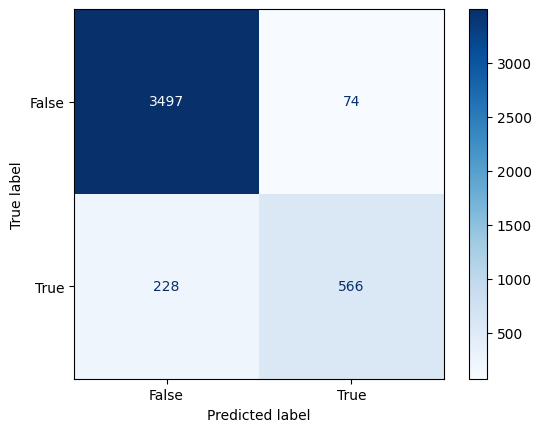

In [905]:
# confusion matrix anzeigen
ConfusionMatrixDisplay.from_estimator(clf_tree,X_test_features, y_test, cmap=plt.cm.Blues)

# classification report
print(classification_report(y_test, predictions))

- 302 Samples wurden dieses mal hier Falsch vorhergesagt
-  wobei dieses mal von den unterrepräsentierten Klasse 4 mehr falsch vorhergesagt wurden

In [906]:
from sklearn.metrics import roc_curve, auc
y_predict_probabilities = clf_tree.predict_proba(X_test_features)[:,1]
fpr, tpr, thr = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

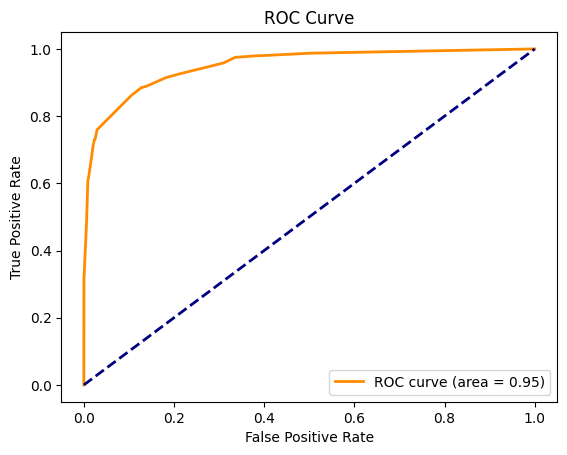

In [907]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

- Auch hier ist die AUC leicht niedriger aber immer noch sehr hoch

# -- Fazit--

- Letztendlich konnte man keine verbesserung sehen durch den Datensatz mit Feature Selection
- Problematisch ist immer noch das die Unterrepräsntierte Klasse nicht gut genug vorhergsagt wird
- Was könnte man noch machen:
- ->andere Algorithmen Anwenden(Random Forest, SVM oder Logistische Regression)
- Das Klassische Train, Validate und Test machen ohne cross validation auf den Trainings daten satz
- Wenn man das Feature "fog" einbezieht in den Datensatz kommt eine vorhersgae mit einen F1 score von 1 raus
- Problem: Kann sein das ich das feature Zeit nicht richtig benutz habe oder die Labels Falsch verstanden habe